In [1]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from qiskit_experiments.framework import *
from qiskit_experiments.library import *
from qiskit.test.mock import *
from qiskit.providers.aer import *

In [2]:
def create_circuit(qc, sent, measure = True):
    qc.append(sent, [0])
    if measure:
        qc.measure(0, 0)
    qc.barrier()
    qc.h(1)
    qc.cx(1, 2)
    qc.barrier()
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()
    qc.cx(1, 2)
    qc.cz(0, 2)
    if measure:
        qc.measure(2, 1)

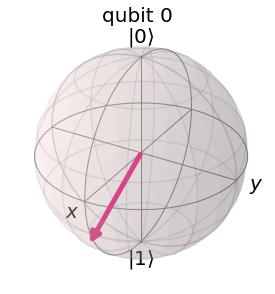

In [3]:
sent = Initialize(random_statevector(2))
plot_bloch_multivector(sent)

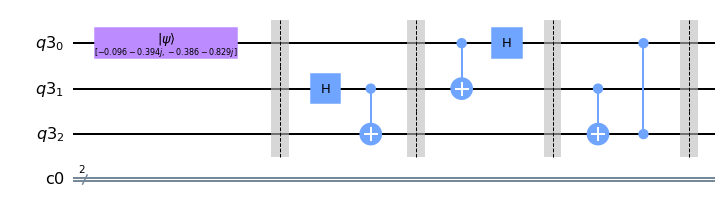

In [4]:
#blochsphere circuit
qc = QuantumCircuit(QuantumRegister(3), ClassicalRegister(2))
create_circuit(qc, sent, False)
qc.save_statevector()
qc.draw()

In [5]:
#initializing backends
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
quito_sim = AerSimulator.from_backend(FakeQuito())
simulator = Aer.get_backend('qasm_simulator')

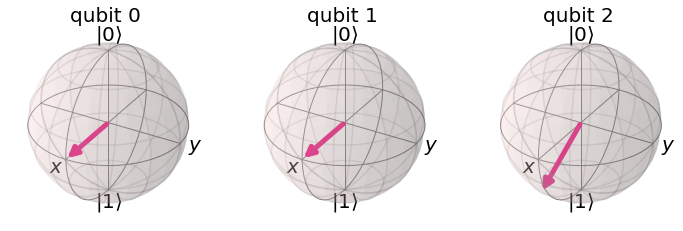

In [6]:
#getting the blochsphere for the noiseless model
results_1 = execute(qc, backend=simulator, shots=1).result()
received_1 = results_1.get_statevector()
plot_bloch_multivector(received_1)

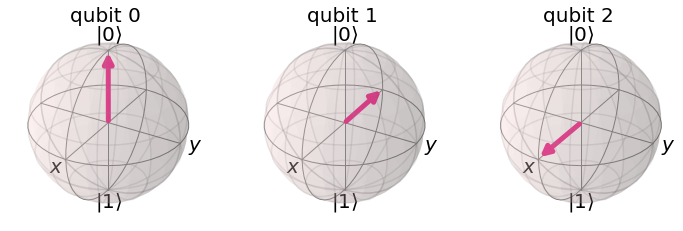

In [7]:
#getting the blochsphere for the noisy model
results_2 = execute(qc, backend = quito_sim, shots = 2048).result()
received_2 = results_2.get_statevector()
plot_bloch_multivector(received_2)
#why is it qubit 1?

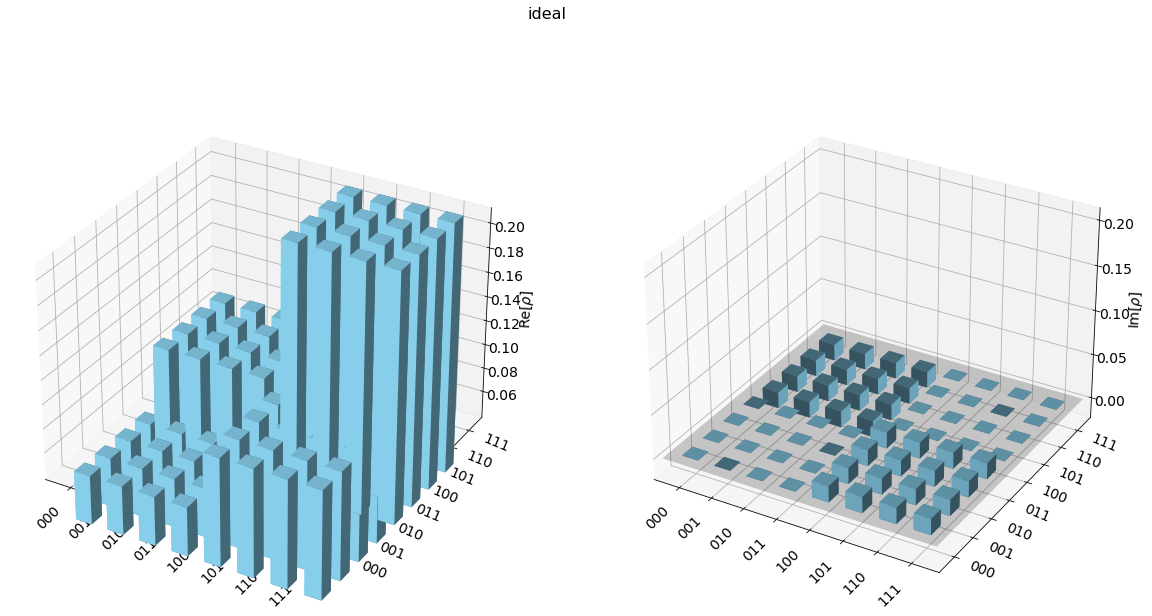

In [8]:
plot_state_city(results_1.get_statevector(qc), figsize = [20, 10], color = ['skyblue', 'skyblue'], title = "ideal")

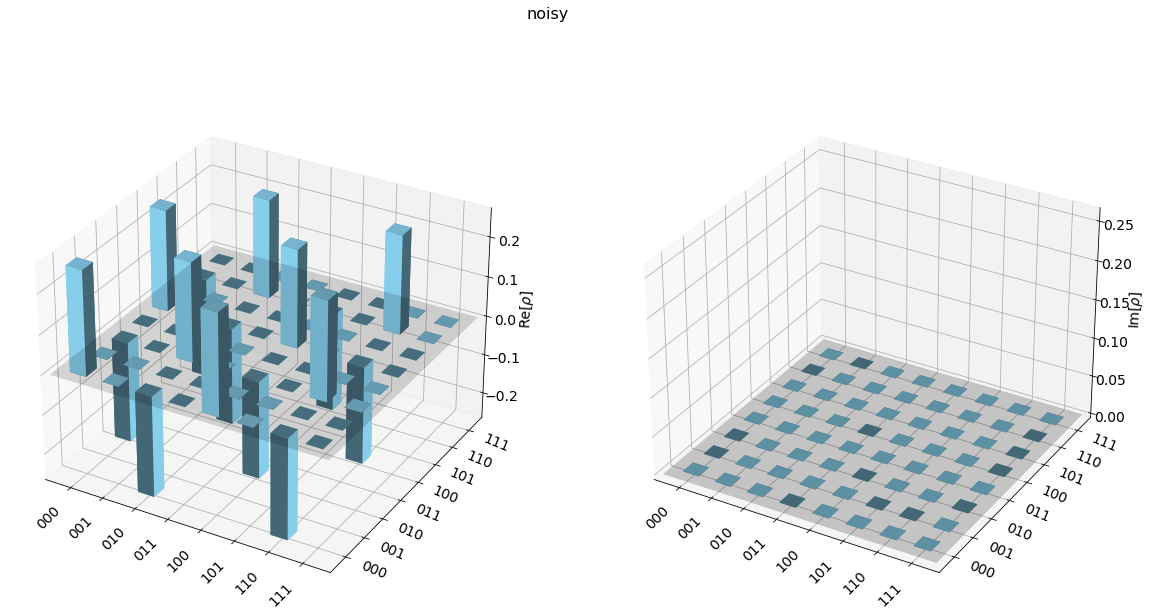

In [9]:
plot_state_city(results_2.get_statevector(qc), figsize = [20, 10], color = ['skyblue', 'skyblue'], title = "noisy")